# Bank Marketing Classification

---

## Introduction

Marketing selling campaigns constitute a typical strategy to enhance business. Companies use direct marketing when targeting segments of customers by contacting them to meet a specific goal. Centralizing customer remote interactions in a contact center eases operational management of campaigns. Such centers allow communicating with customers through various channels, telephone (fixed-line or mobile) being one of the most widely used. Marketing operationalized through a contact center is called telemarketing due to the remoteness characteristic. Contacts can be divided into inbound and outbound, depending on which side triggered the contact (client or contact center), with each case posing different challenges (e.g., outbound calls are often considered more intrusive). Technology enables rethinking marketing by focusing on maximizing customer lifetime value through the evaluation of available information and customer metrics, thus allowing us to build longer and tighter relations in alignment with business demand.

citation: [Moro, Sérgio, Paulo Cortez, and Paulo Rita. "A data-driven approach to predict the success of bank telemarketing." Decision Support Systems 62 (2014): 22-31.](https://www.sciencedirect.com/science/article/pii/S016792361400061X)

## Dataset

This research focus on targeting through telemarketing phone calls to sell long-term deposits. Within a campaign, the human agents execute phone calls to a list of clients to sell the deposit (outbound) or, if meanwhile the client calls the contact-center for any other reason, he is asked to subscribe the deposit (inbound). Thus, the result is a binary unsuccessful or successful contact.

Each record included the output target, the contact outcome ({“failure”, “success”}), and candidate input features. These include telemarketing attributes (e.g., call direction), product details (e.g., interest rate offered) and client information (e.g., age). These records were enriched with social and economic influence features (e.g., unemployment variation rate), by gathering external data from the central bank of the Portuguese Republic statistical web site1.

The link to the dataset: [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

---

## EDA

### 01. Reading in the data

In [1]:
# impoerting libraries and modules
import pandas as pd, numpy as np, seaborn as sns, matplotlib as mpl, matplotlib.pyplot as plt, os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
# deep learning libraries
from keras.layers import *
from keras.models import Sequential
# settings for visualization
plt.rcParams['font.size'] = 12

In [2]:
# changing directory to data location
os.chdir('./Data')

In [3]:
# reading the dataset
path = 'bank-additional/bank-additional'
bankdf = pd.read_csv(filepath_or_buffer = path + '/bank-additional-full.csv', sep = ';')
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset doesn't contain any null values

In [5]:
bankdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### 02. Handling unknown values

In [6]:
# removing all the observations that contain at least one unknown value
for feature in bankdf.columns:
    bankdf.drop(index = bankdf[feature][bankdf[feature] == 'unknown'].index, inplace = True)

In [7]:
# now if we try this line of code it will give us an empty data frame
bankdf[bankdf.values == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [8]:
# now we have reduced the dataset size but gained a cleaner version.
bankdf.shape

(30488, 21)

### 03. Encoding categorical features

In [9]:
# getting number of unique values in object features as a dataframe
categoricalFeatures = bankdf.dtypes[bankdf.dtypes == object].index
uniqueValues = []

for featureName in categoricalFeatures:
    uniqueValues.append(len(pd.unique(bankdf[featureName])))

uniquedf = pd.DataFrame(uniqueValues, index = categoricalFeatures, columns = ['unique_values'])
uniquedf

,unique_values
job,11
marital,3
education,7
default,2
housing,2
loan,2
contact,2
month,10
day_of_week,5
poutcome,3


In [10]:
# encoding the feature with only two unique values as binary features
for i in uniquedf[uniquedf == 2].dropna().index:
    if i != 'contact':
        bankdf[i] = bankdf[i].replace(to_replace = {'yes': 1, 'no': 0}).astype(np.uint8)

bankdf['contact'] = bankdf['contact'].replace(to_replace = {'telephone': 1, 'cellular': 0}).astype(np.uint8)

In [11]:
# replacing the never called before value 999 with 0 in pdays
bankdf['pdays'] = bankdf['pdays'].replace(to_replace = {999: 0}).astype(np.int64)

In [12]:
objectColumns = bankdf.dtypes[bankdf.dtypes == object].index.to_list()
objectColumns

['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']

In [13]:
# one hot encoding the data using pandas get_dummies class
bankdf = pd.get_dummies(data = bankdf, columns = objectColumns, drop_first = True, dtype = np.uint8)

In [14]:
bankdf.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,0,0,1,261,1,0,0,1.1,...,1,0,0,0,1,0,0,0,1,0
2,37,0,1,0,1,226,1,0,0,1.1,...,1,0,0,0,1,0,0,0,1,0
3,40,0,0,0,1,151,1,0,0,1.1,...,1,0,0,0,1,0,0,0,1,0
4,56,0,0,1,1,307,1,0,0,1.1,...,1,0,0,0,1,0,0,0,1,0
6,59,0,0,0,1,139,1,0,0,1.1,...,1,0,0,0,1,0,0,0,1,0


In [15]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30488 non-null  int64  
 1   default                        30488 non-null  uint8  
 2   housing                        30488 non-null  uint8  
 3   loan                           30488 non-null  uint8  
 4   contact                        30488 non-null  uint8  
 5   duration                       30488 non-null  int64  
 6   campaign                       30488 non-null  int64  
 7   pdays                          30488 non-null  int64  
 8   previous                       30488 non-null  int64  
 9   emp.var.rate                   30488 non-null  float64
 10  cons.price.idx                 30488 non-null  float64
 11  cons.conf.idx                  30488 non-null  float64
 12  euribor3m                      30488 non-null 

### 04. Handling noninformative features

In [16]:
# working on only numeric features
numericFeatures = bankdf.dtypes[bankdf.dtypes != np.uint8].index.to_list()

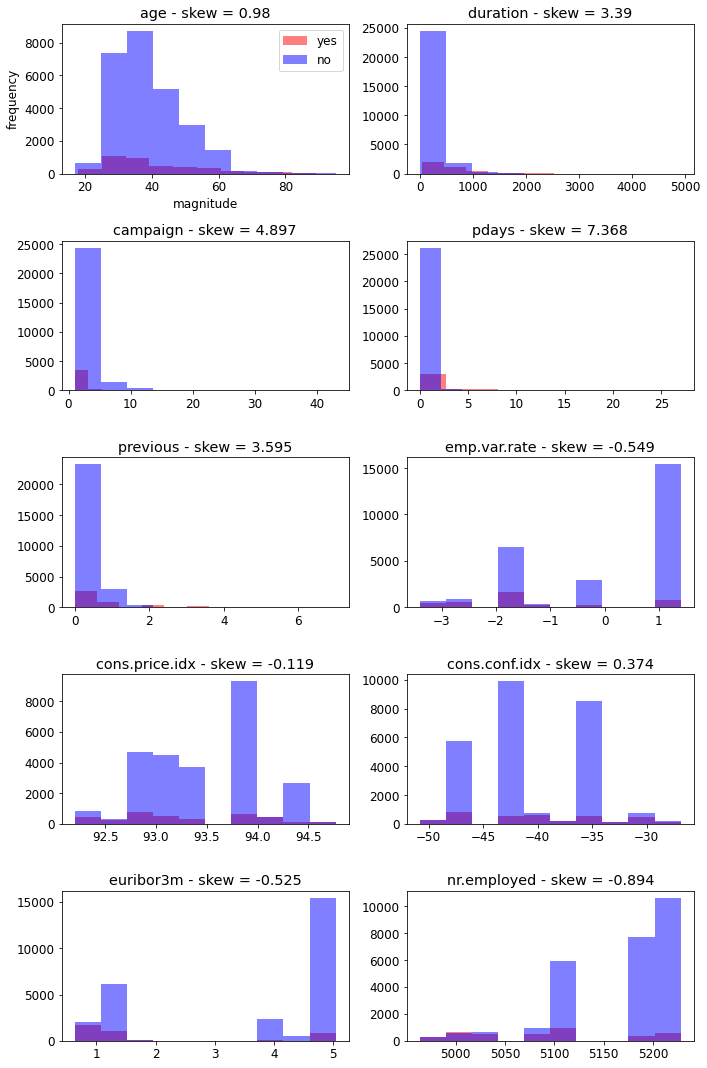

In [17]:
# plotting histograms fo data to get insights of numeric features

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 15))
ax = axes.ravel()
yes = bankdf[numericFeatures][bankdf['y'] == 1]
no = bankdf[numericFeatures][bankdf['y'] == 0]


for i in range(10):
    ax[i].hist(yes.iloc[:, i], color = 'red', alpha = 0.5)
    ax[i].hist(no.iloc[:, i], color = 'blue', alpha = 0.5)
    skew = round(bankdf[numericFeatures[i]].skew(), 3)
    ax[i].set_title(numericFeatures[i] + ' - skew = ' + str(skew))

ax[0].set_xlabel('magnitude')
ax[0].set_ylabel('frequency')
ax[0].legend(['yes', 'no'], loc = 'best')
fig.tight_layout()

from the previous graph we can find that the feature `pdays` has almost no effect on the target variable `y`

In [18]:
# removing noninformative features
bankdf.drop(columns = ['pdays'], inplace = True)
bankdf.shape

(30488, 47)

In [19]:
# working on only encoded object features
objectFeatures = bankdf.dtypes[bankdf.dtypes == np.uint8].index.to_list()
objectFeatures.remove('y')

In [20]:
len(objectFeatures)

37

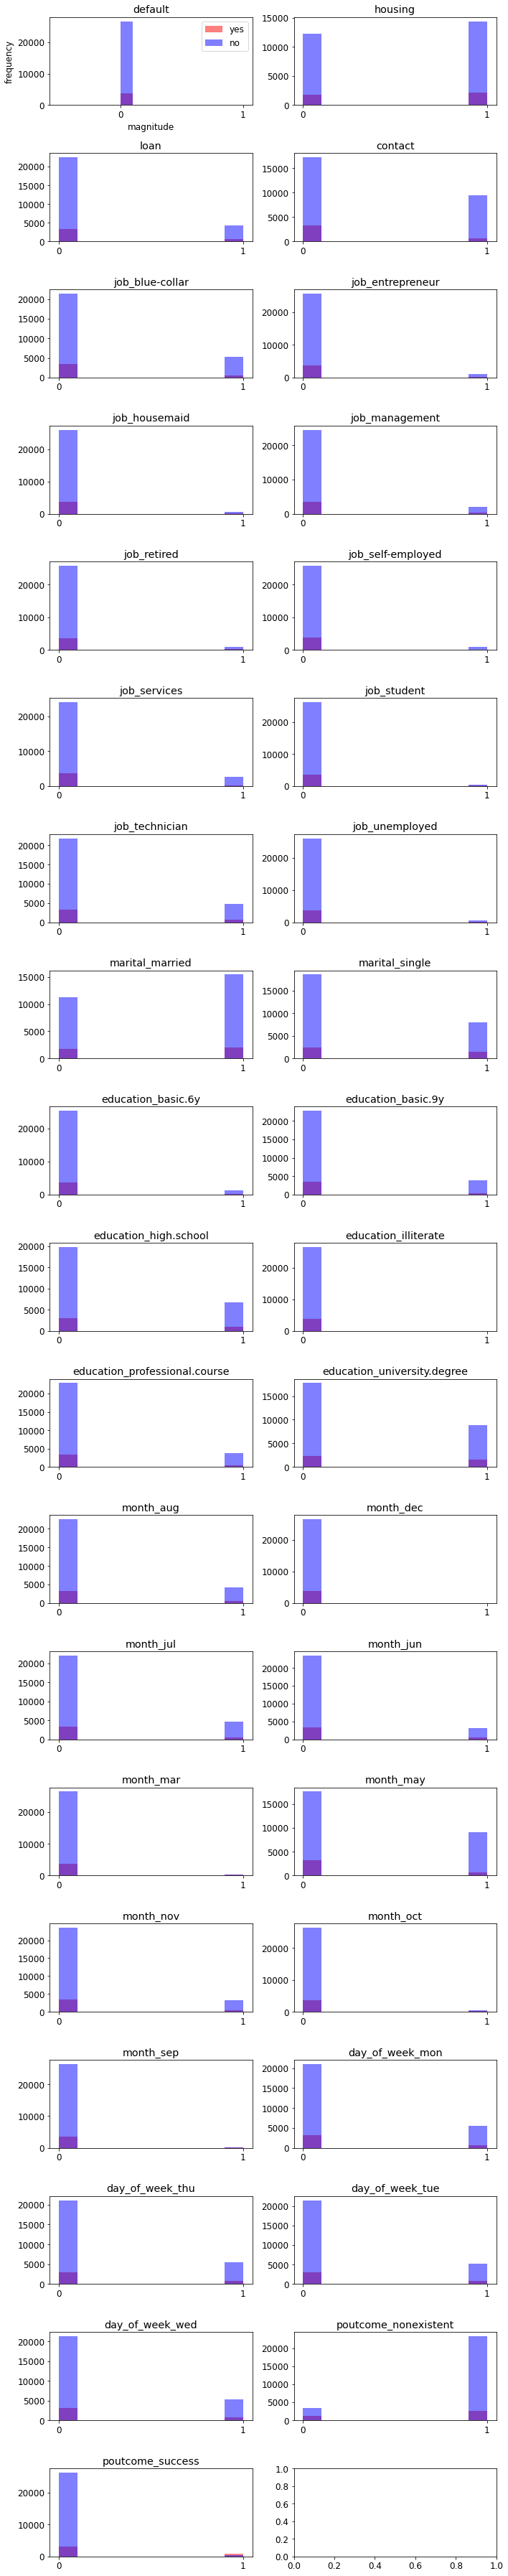

In [21]:
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (10, 50))
ax = axes.ravel()
yes = bankdf[objectFeatures][bankdf['y'] == 1]
no = bankdf[objectFeatures][bankdf['y'] == 0]


for i in range(37):
    ax[i].hist(yes.iloc[:, i], color = 'red', alpha = 0.5)
    ax[i].hist(no.iloc[:, i], color = 'blue', alpha = 0.5)
    ax[i].set_title(objectFeatures[i])
    ax[i].set_xticks((0, 1))

ax[0].set_xlabel('magnitude')
ax[0].set_ylabel('frequency')
ax[0].legend(['yes', 'no'], loc = 'best')
fig.tight_layout()

from the previous graph we can find that the feature `default` has no effect on the target variable `y`

In [22]:
# now we remove the noninformative features
bankdf.drop(columns = ['default'], inplace = True)
bankdf.shape

(30488, 46)

---

## Modeling

### 01. Splitting the data into train and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(bankdf.drop(columns = ['y']), bankdf['y'], 
                                                    test_size = 0.3, stratify = bankdf['y'], random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21341, 45), (9147, 45), (21341,), (9147,))

### 02. Scaling the data

In [24]:
mmscaler = MinMaxScaler()
mmscaler = mmscaler.fit(X_train)
X_trainmm = mmscaler.transform(X_train)
X_testmm = mmscaler.transform(X_test)

### 03. Logistic regression models

In [25]:
logreg = LogisticRegression(max_iter = 1e5, random_state = 42).fit(X_trainmm, y_train)

In [26]:
# accuracy score o the test set
logreg.score(X_testmm, y_test)

0.8989832732043292

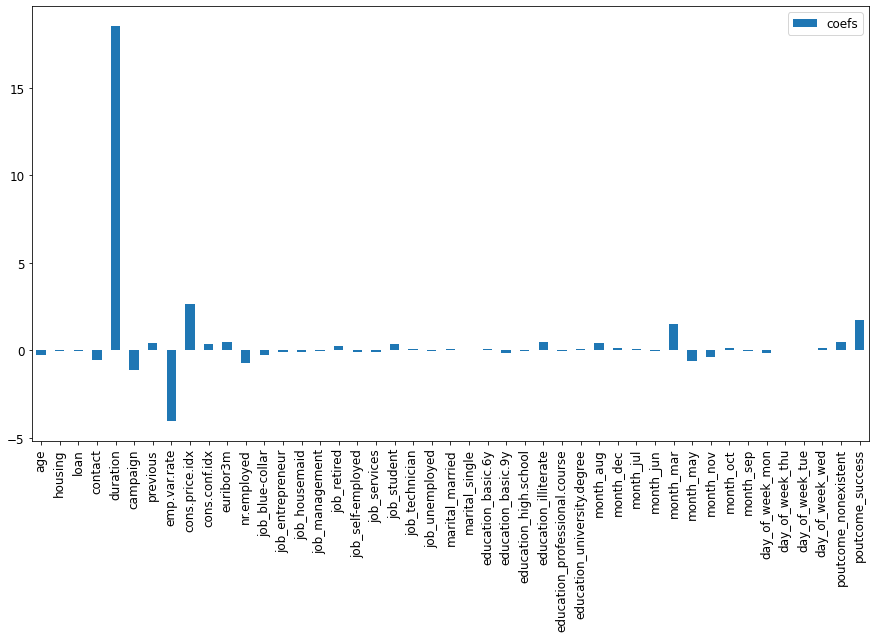

In [27]:
# bar plot of the coefficients resulting from the fit
_, ax = plt.subplots(figsize = (15, 8))
_ = pd.DataFrame(logreg.coef_.T, columns = ['coefs'], index = X_train.columns).plot(kind = 'bar', ax = ax)

It can be seen that the feature duration heavily affects the output answer

In [28]:
# defining a metrics function to print out the classification report and plot the confusion matrix
def plot_cm(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(cm)
    _, ax = plt.subplots(figsize = (8, 8))
    print('\n\nClassification Report\n\n')
    print(classification_report(y_test, predictions))
    return disp.plot(ax = ax)



Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7989
           1       0.67      0.41      0.50      1158

    accuracy                           0.90      9147
   macro avg       0.79      0.69      0.72      9147
weighted avg       0.89      0.90      0.89      9147



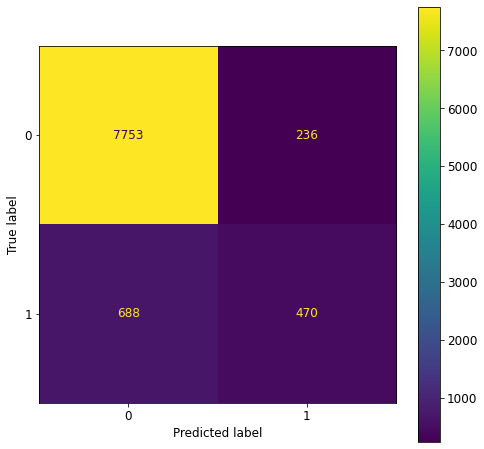

In [29]:
_ = plot_cm(y_test, logreg.predict(X_testmm))

In [30]:
logregCV = LogisticRegressionCV(Cs = 10, cv = 5, penalty = 'l2', solver = 'liblinear', 
                               scoring = 'accuracy', random_state = 42, n_jobs = -1).fit(X_trainmm, y_train)

In [31]:
logregCV.score(X_testmm, y_test)

0.8998578768995299



Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7989
           1       0.65      0.45      0.53      1158

    accuracy                           0.90      9147
   macro avg       0.79      0.71      0.74      9147
weighted avg       0.89      0.90      0.89      9147



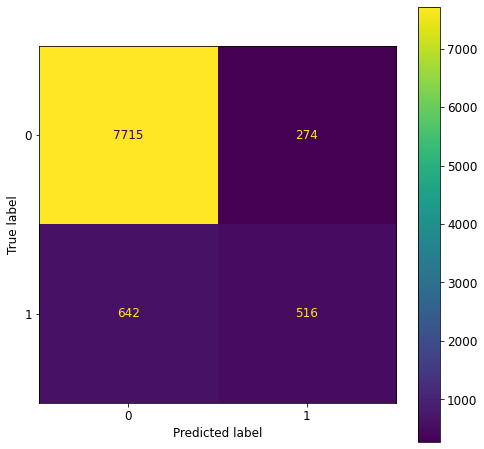

In [32]:
_ = plot_cm(y_test, logregCV.predict(X_testmm))

In [33]:
logregCV = LogisticRegressionCV(Cs = 10, cv = 5, penalty = 'l1', solver = 'liblinear', 
                               scoring = 'accuracy', random_state = 42, n_jobs = -1).fit(X_trainmm, y_train)

In [34]:
logregCV.score(X_testmm, y_test)

0.8997485514376298



Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7989
           1       0.65      0.44      0.53      1158

    accuracy                           0.90      9147
   macro avg       0.79      0.71      0.74      9147
weighted avg       0.89      0.90      0.89      9147



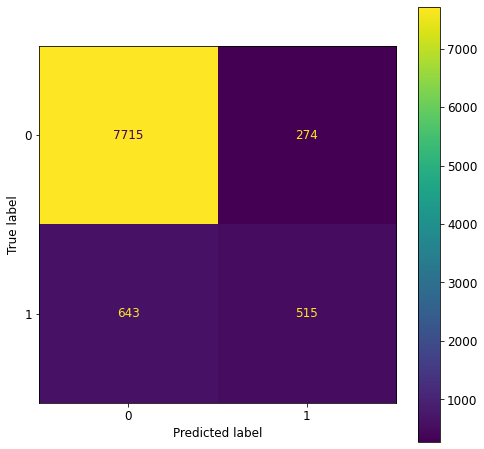

In [35]:
_ = plot_cm(y_test, logregCV.predict(X_testmm))

### 04. SVM models

In [36]:
linearsvc = LinearSVC(random_state = 42).fit(X_trainmm, y_train)

In [37]:
linearsvc.score(X_testmm, y_test)

0.8981086695091287



Classification Report


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7989
           1       0.67      0.38      0.49      1158

    accuracy                           0.90      9147
   macro avg       0.79      0.68      0.71      9147
weighted avg       0.88      0.90      0.89      9147



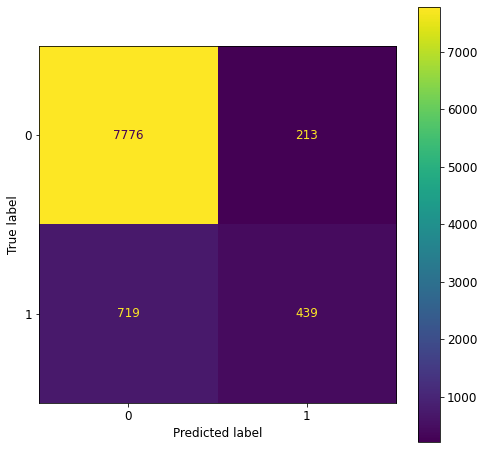

In [38]:
_ = plot_cm(y_test, linearsvc.predict(X_testmm))

In [39]:
# using grid search cross validation
parameters = {'C': [1.0, 10.0, 100.0, 1000.0, 10000.0]}
svc = SVC(random_state = 42)
clf = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy')
clf = clf.fit(X_trainmm, y_train)

In [40]:
clf.score(X_testmm, y_test)

0.8915491417951241



Classification Report


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7989
           1       0.61      0.41      0.49      1158

    accuracy                           0.89      9147
   macro avg       0.76      0.69      0.71      9147
weighted avg       0.88      0.89      0.88      9147



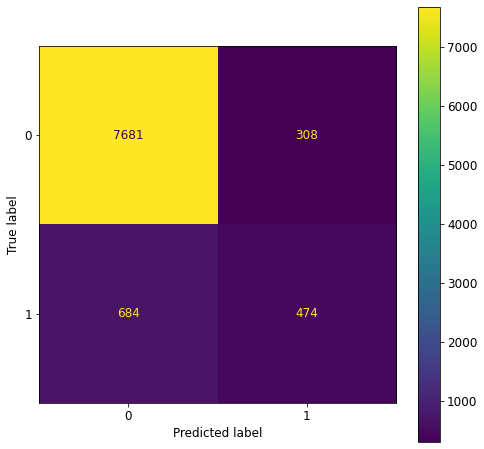

In [41]:
_ = plot_cm(y_test, clf.predict(X_testmm))

### 05. Dense neural networks modeling

In [42]:
# model construction
dnn = Sequential()
dnn.add(layer = Dense(units = 128, activation = 'relu', input_shape = (45,)))
dnn.add(layer = Dropout(rate = 0.5))
dnn.add(layer = Dense(units = 128, activation = 'relu'))
dnn.add(layer = Dropout(rate = 0.5))
dnn.add(layer = Dense(units = 1, activation = 'sigmoid'))
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5888      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,529
Trainable params: 22,529
Non-trainable params: 0
_________________________________________________________________


In [43]:
dnn.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')

In [44]:
dnn_history = dnn.fit(X_trainmm, y_train, batch_size = 128, epochs = 30, validation_split = 0.1)

Epoch 1/30
151/151 [==============================] - 4s 7ms/step - loss: 0.3374 - val_loss: 0.2938
Epoch 2/30
151/151 [==============================] - 1s 4ms/step - loss: 0.3055 - val_loss: 0.2772
Epoch 3/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2902 - val_loss: 0.2675
Epoch 4/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2804 - val_loss: 0.2594
Epoch 5/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2647 - val_loss: 0.2416
Epoch 6/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2529 - val_loss: 0.2325
Epoch 7/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2455 - val_loss: 0.2275
Epoch 8/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2376 - val_loss: 0.2214
Epoch 9/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2302 - val_loss: 0.2160
Epoch 10/30
151/151 [==============================] - 1s 4ms/step - loss: 0.2210 - val_loss: 0.2114

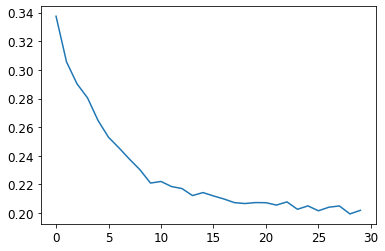

In [45]:
_ = plt.plot(dnn_history.history['loss'])

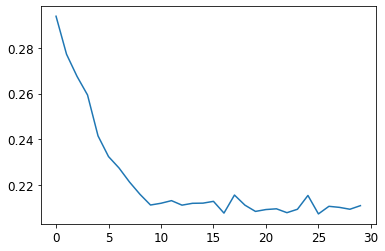

In [46]:
_ =plt.plot(dnn_history.history['val_loss'])

In [47]:
dnn.evaluate(X_testmm, y_test, batch_size = 128)

72/72 [==============================] - 0s 2ms/step - loss: 0.2191


0.21905142068862915



Classification Report


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7989
           1       0.59      0.58      0.59      1158

    accuracy                           0.90      9147
   macro avg       0.77      0.76      0.76      9147
weighted avg       0.90      0.90      0.90      9147



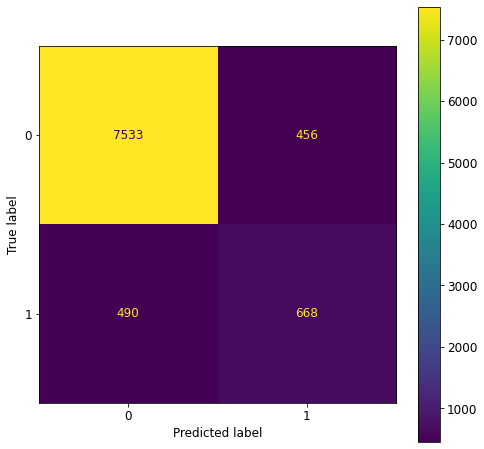

In [48]:
predictions = (dnn.predict(X_testmm) >= 0.5).astype(int)
_ = plot_cm(y_test, predictions)

---

## Conclusion

All the models gave out the same score on the test set. This is most likely due to the fact that there are many outliers in the dataset. The next step for this analysis is to handle the outliers heavily using different mechanisms.

Thank you

Hossam Gamal Mostafa

# End